In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import regex as re
import spacy

### Basic NLP

In [ ]:
text="This warning shouldn't be :) taken lightly."

In [ ]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(text,'html.parser')
text_parsed=soup.get_text(strip=True)
print(text_parsed)

In [ ]:
tokens=[t for t in text.split()]

In [ ]:
clean_text=re.sub(r"\p{p}+","",text)
print(clean_text.split())

In [ ]:
nlp=spacy.load('en_core_web_sm') # load a thing 
doc=nlp(text)
print([token.text for token in doc])

### test if this word is a stopword??

In [ ]:
print([(token.text,token.is_stop) for token in doc])

In [ ]:
print([(token.text,token.lemma_) for token in nlp("we are meeting tomorrow")])

In [ ]:
#POS tagging
print([(token.text,token.pos_) for token in doc])
#POS tagging might not work for Tweets since the words in 
#tweets are often shortened on purpose and the 
#model provided by the library might have never seen such words. 

### Text feature extraction

In [ ]:
texts=["blue car and blue window",
      "black crow in the window",
      "i see my reflection in the window"]

In [ ]:
vocab=sorted(set(word for sentence in texts for word in sentence.split()))
print(len(vocab),vocab)

In [ ]:
def binary_transform(text):
    #create a vector with all entries as 0
    output=np.zeros(len(vocab))
    words=set(text.split())
    for i,v in enumerate(vocab):
        output[i]=v in words
    return output
print(binary_transform('i saw crow'))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec=CountVectorizer(binary=True)
vec.fit(texts)
print([w for w in sorted(vec.vocabulary_.keys())])

In [ ]:
pd.DataFrame(vec.transform(texts).toarray(),columns=sorted(vec.vocabulary_.keys()))

### Text Clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
from sklearn.datasets import load_files
random_state=8
DATA_DIR="./bbc/"
data = load_files(DATA_DIR,encoding="utf-8",decode_error="replace",random_state=random_state)

In [4]:
df=pd.DataFrame(list(zip(data['data'],data['target'])),columns=['text','label'])
df.head(10)

,text,label
0,Ireland call up uncapped Campbell\n\nUlster sc...,3
1,Gurkhas to help tsunami victims\n\nBritain has...,2
2,Egypt and Israel seal trade deal\n\nIn a sign ...,0
3,Cairn shares up on new oil find\n\nShares in C...,0
4,Saudi NCCI's shares soar\n\nShares in Saudi Ar...,0
5,US data sparks inflation worries\n\nWholesale ...,0
6,Halloween writer Debra Hill dies\n\nScreenwrit...,1
7,French boss to leave EADS\n\nThe French co-hea...,0
8,Chepkemei joins Edinburgh line-up\n\nSusan Che...,3
9,Johnson announces June retirement\n\nFormer En...,3


In [5]:
vec=TfidfVectorizer ()
vec.fit(df.text.values)
features=vec.transform(df.text.values)

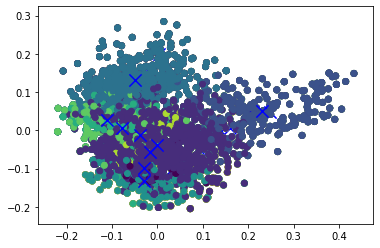

In [6]:
s_score=[]
for i in np.arange(2,10):
    cls=MiniBatchKMeans(n_clusters=i,random_state=random_state)
    cls.fit(features)
    cls.predict(features)
    cls.labels_
    # reduce the features to 2D
    pca = PCA(n_components=2,svd_solver='full', random_state=random_state)
    reduced_features = pca.fit_transform(features.toarray())
    # reduce the cluster centers to 2D
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)
    plt.scatter(reduced_features[:,0],reduced_features[:,1],c=cls.predict(features))
    plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
    score=silhouette_score(features, cls.predict(features))
    s_score.append(score)

Text(0, 0.5, 'silhouette_score')

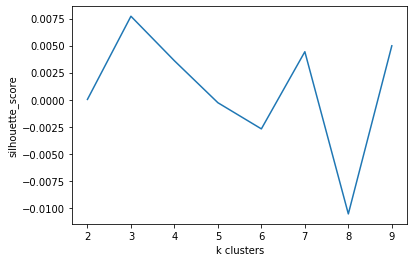

In [7]:
plt.plot(np.arange(2,10),s_score)
plt.xlabel('k clusters')
plt.ylabel('silhouette_score')

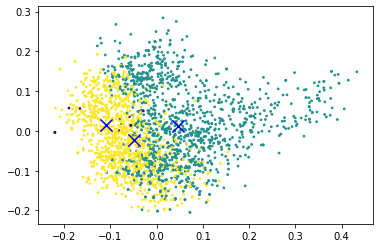

In [8]:
cls=MiniBatchKMeans(n_clusters=3,random_state=random_state)
cls.fit(features)
cls.predict(features)
cls.labels_
# reduce the features to 2D
pca = PCA(n_components=2,svd_solver='full', random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
plt.scatter(reduced_features[:,0],reduced_features[:,1],c=cls.predict(features),s=3)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
score=silhouette_score(features, cls.predict(features))
s_score.append(score)